# EACO-RAG: Enhancing Retrieval-Augmented Generation with Edge Computing





EACO-RAG (Edge-Aware Retrieval-Augmented Generation) enhances traditional RAG systems by integrating edge computing to facilitate faster and more efficient responses. By distributing vector datasets across edge nodes, EACO-RAG reduces delays and optimizes resource usage. The framework incorporates adaptive knowledge updates and inter-node collaboration to improve response accuracy. Additionally, a multi-armed bandit approach is employed to optimize cost, accuracy, and delay in real-time, making it a robust solution for knowledge-intensive tasks.



## Key Features of EACO-RAG



- **Edge Computing Integration**: Utilizes edge computing to store and process data closer to the source, minimizing latency and bandwidth usage.

- **Distributed Vector Datasets**: Distributes vector datasets across multiple edge nodes, allowing for quicker access to relevant information and reducing delays in response times.

- **Adaptive Knowledge Updates**: Implements mechanisms for real-time updates of knowledge across edge nodes, ensuring that the system remains current and accurate.

- **Inter-Node Collaboration**: Facilitates communication between edge nodes to share insights and improve overall response quality.

- **Multi-Armed Bandit Optimization**: Employs a multi-armed bandit approach to balance trade-offs between cost, accuracy, and response time dynamically.



## How EACO-RAG Works



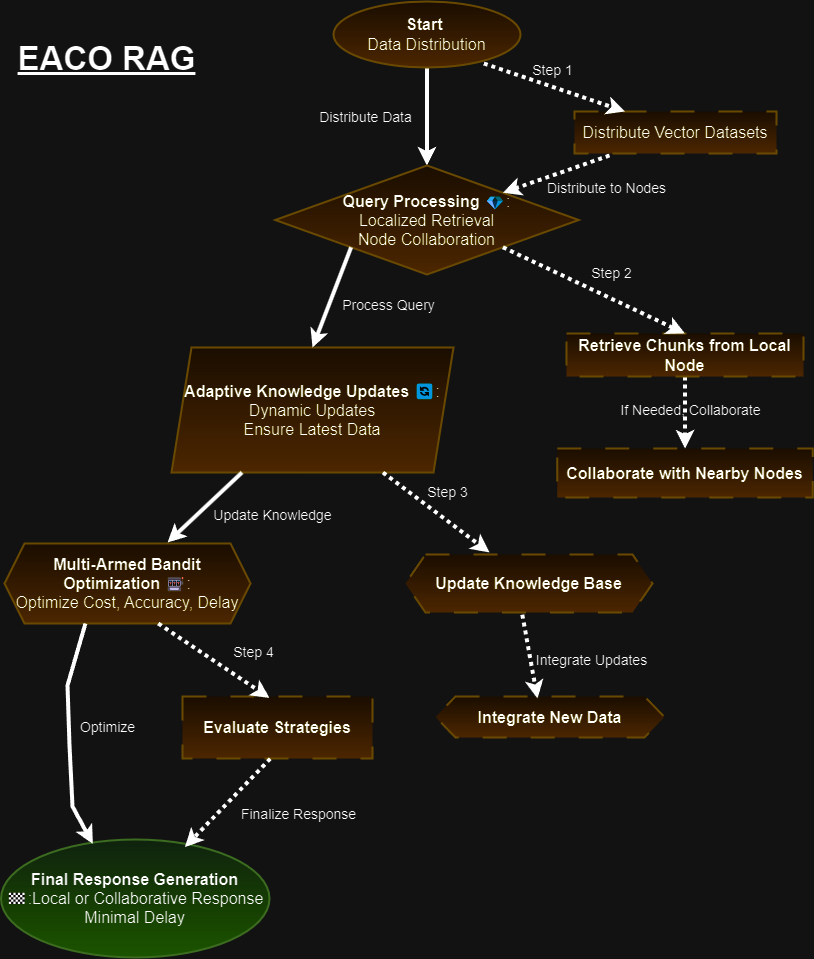

1. **Data Distribution**:
   - The system begins by distributing vector datasets across various edge nodes based on their relevance and expected query types.
   - This distribution allows for localized processing and retrieval of information.

2. **Query Processing**:
   - When a query is received, it is processed at the nearest edge node, which retrieves relevant chunks from its local dataset.
   - If additional information is needed, the node can collaborate with other nearby nodes to obtain further context.

3. **Adaptive Knowledge Updates**:
   - As new information becomes available or as queries are processed, edge nodes update their knowledge bases dynamically.
   - This ensures that all nodes have access to the latest data, improving overall accuracy.

4. **Multi-Armed Bandit Optimization**:
   - The system employs a multi-armed bandit algorithm to evaluate different strategies for balancing cost, accuracy, and delay.
   - This real-time optimization enables the system to adapt its retrieval strategies based on current conditions and user needs.

5. **Final Response Generation**:
   - After retrieving relevant data from local or collaborating nodes, the final response is generated based on the integrated information.
   - This output is then returned to the user with minimal delay.



In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

Encoded query and rules: Query: What is BERT? | Rules: Focus on BERT architecture., Prioritize semantic understanding.
Selected strategy: local_processing
Generated answer: According to the passage, BERT is a pre-training method that trains a bi-directional Transformer LM on a large text corpus, which includes the BooksCorpus (800M words) and Wikipedia (2,500M words). The passage also mentions that BERT is a fine-tuning approach, and highlights its similarities and differences with OpenAI GPT, another fine-tuning approach.
Generated answer: BERT stands for Bidirectional Encoder Representations from Transformers, which is a language model developed by Google in 2018.
Generated answer: Based on the passage, here's an accurate answer to the query "What is BERT?":

BERT is a pre-trained language model with a unified architecture across different tasks. It has a multi-layer bidirectional Transformer encoder architecture, based on the original implementation described in Vaswani et al. (2017

In [ ]:
# Step 0: Initialize the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and process the PDF document
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Distribute vector datasets (simulated with chunks)
query = "What is BERT?"

In [ ]:
chunks = [text[i:i + 1000] for i in range(0, len(text), 1000)]  # Simulating edge node distribution

In [ ]:
# Step 3: Process query using vectorization
vectorizer = TfidfVectorizer()
chunk_embeddings = vectorizer.fit_transform(chunks)
query_embedding = vectorizer.transform([query])

In [ ]:
# Calculate the cosine similarity for retrieval
similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()

In [ ]:
top_k = 3  # Retrieve top 3 most relevant chunks

In [ ]:
top_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in top_chunk_indices]

In [ ]:
# Step 4: Adaptive updates for dynamic knowledge (simulated with rules)
rules = ["Focus on BERT architecture.", "Prioritize semantic understanding."]
encoded_query = f"Query: {query} | Rules: {', '.join(rules)}"
print(f"Encoded query and rules: {encoded_query}")

Encoded query and rules: Query: What is BERT? | Rules: Focus on BERT architecture., Prioritize semantic understanding.


In [ ]:
# Step 5: Multi-Armed Bandit optimization for balancing accuracy and delay (simulated)
strategies = ["local_processing", "distributed_collaboration"]
selected_strategy = strategies[0]  # Example: Choosing the first strategy for simplicity
print(f"Selected strategy: {selected_strategy}")

Selected strategy: local_processing


In [ ]:
# Step 6: Generate answers using retrieved passages
answers = []
for chunk in retrieved_chunks:
    try:
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are an assistant focused on distributed data retrieval."},
                {"role": "user", "content": f"Given the query: '{query}' and passage: '{chunk}', generate an accurate answer."},
            ],
            model="llama3-8b-8192",
        )
        answer = response.choices[0].message.content
        answers.append(answer)
        print(f"Generated answer: {answer}")
    except Exception as e:
        print(f"Error generating answer: {e}")

Generated answer: Based on the passage, BERT is described as a pre-training method that is trained on a large text corpus, specifically combining the BooksCorpus (800M words) and Wikipedia (2,500M words). It is also mentioned that many design decisions in BERT were made to make it close to OpenAI GPT, a left-to-right Transformer LM, to enable a minimal comparison between the two methods.
Generated answer: Based on the passage, BERT is a pre-trained language model architecture that has been fine-tuned and evaluated on various tasks. According to the results presented in the passage, BERT LARGE outperforms BERT BASE and OpenAI GPT on all tasks by a significant margin, obtaining average accuracy improvements of 4.5% and 7.0% respectively over the prior state of the art.
Generated answer: Here's a potential answer to the query:

BERT stands for Bidirectional Encoder Representations from Transformers. It's a type of language model developed by Google in 2018 that's designed to pre-train dee

In [ ]:
# Step 7: Final response
final_output = {
    "query": query,
    "answers": answers,
}

In [ ]:
print("\n--- Final Output ---\n")
print(final_output)


--- Final Output ---

{'query': 'What is BERT?', 'answers': ['Based on the passage, BERT is described as a pre-training method that is trained on a large text corpus, specifically combining the BooksCorpus (800M words) and Wikipedia (2,500M words). It is also mentioned that many design decisions in BERT were made to make it close to OpenAI GPT, a left-to-right Transformer LM, to enable a minimal comparison between the two methods.', 'Based on the passage, BERT is a pre-trained language model architecture that has been fine-tuned and evaluated on various tasks. According to the results presented in the passage, BERT LARGE outperforms BERT BASE and OpenAI GPT on all tasks by a significant margin, obtaining average accuracy improvements of 4.5% and 7.0% respectively over the prior state of the art.', "Here's a potential answer to the query:\n\nBERT stands for Bidirectional Encoder Representations from Transformers. It's a type of language model developed by Google in 2018 that's designed


1. **Dataset Construction:**  
   The code downloads a research paper on BERT and processes its content. The document is split into chunks of 1000 characters, simulating the distribution of datasets across multiple nodes for localized processing.

2. **Query Processing:**  
   A user query, "What is BERT?" is encoded using TF-IDF vectorization. The query is matched against the chunked document to retrieve the most relevant passages based on cosine similarity.

3. **Rule-Guided Adaptation:**  
   Additional rules like "Focus on BERT architecture" are added to the query encoding to improve retrieval relevance. This approach ensures the retrieved information aligns with the logical and contextual needs of the query.

4. **Dynamic Knowledge Updates:**  
   Although not implemented dynamically, the code framework allows for future extensions where edge nodes can update their datasets based on incoming queries or new information.

5. **Multi-Armed Bandit Optimization (Simulated):**  
   The system selects retrieval strategies (e.g., local processing or collaboration between nodes). While the code assumes a single strategy for simplicity, this could be expanded to use adaptive methods like Multi-Armed Bandit algorithms to optimize cost, delay, and accuracy.

6. **Answer Generation:**  
   Retrieved passages are processed with a language model via the Groq API. Each passage is used to generate contextually accurate answers to the query.

7. **Final Response:**  
   The retrieved answers are aggregated and presented to the user. This output combines localized retrieval, rule-guided refinement, and high-quality language model generation for a comprehensive response.

## Applications of EACO-RAG



- **Real-Time Analytics**: Suitable for applications requiring immediate insights from large datasets, such as financial trading systems or monitoring platforms.

- **Smart City Solutions**: Enhances traffic management systems by providing timely data processing at the edge for optimal decision-making.

- **Content Delivery Networks (CDNs)**: Improves content delivery by caching frequently accessed data at edge locations, reducing latency for end-users.

- **IoT Applications**: Supports smart home devices and other IoT applications that require low-latency access to data for real-time processing.



## Advantages of EACO-RAG



- **Faster Response Times**: By leveraging edge computing, EACO-RAG significantly reduces latency in retrieving relevant information, leading to quicker responses.

- **Resource Efficiency**: The distributed nature of data storage minimizes resource consumption by reducing the need for centralized processing.

- **Improved Accuracy**: Adaptive updates and collaboration between nodes enhance the accuracy of responses by ensuring that the most relevant information is utilized.

- **Real-Time Optimization**: The multi-armed bandit approach allows for continuous optimization based on real-time feedback, ensuring that the system adapts to changing conditions effectively.



## Limitations of EACO-RAG



- **Complexity in Implementation**: Integrating edge computing with RAG systems can introduce complexity in design and management.

- **Dependence on Network Quality**: The effectiveness of edge computing relies on the quality of network connections between nodes; poor connectivity can hinder performance.

- **Scalability Challenges**: While edge computing offers many benefits, scaling the infrastructure across numerous nodes can be resource-intensive and logistically challenging.



## Conclusion



EACO-RAG represents a significant advancement in retrieval-augmented generation methodologies by integrating edge computing capabilities. Its ability to enhance response times while optimizing resource usage makes it a powerful solution for knowledge-intensive tasks. As AI continues to evolve alongside advancements in edge computing technology, frameworks like EACO-RAG will play a crucial role in delivering efficient and accurate information retrieval systems.



Having explored EACO-RAG, we will now move on to RULE RAG.